In [1]:
library(Hmisc)
library(MESS)
library(data.table)

Warning message:
"package 'Hmisc' was built under R version 3.5.2"Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, units

Loading required package: geepack
Loading required package: geeM
Loading required package: Matrix


In [2]:
library(dplyr)
library(ggplot2)
if(!require(ggExtra)) {install.packages("ggExtra");require(ggExtra)}
if(!require(naniar)) {install.packages("naniar");require(naniar)}
if(!require(mvoutlier)) {install.packages("mvoutlier");require(mvoutlier)}
if(!require(MissMech)) {install.packages("MissMech");require(MissMech)}
if(!require(mice)) {install.packages("mice");require(mice)}
if(!require(MatchIt)) {install.packages("MatchIt");require(MatchIt)}


Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:Hmisc':

    src, summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: ggExtra
Warning message:
"package 'ggExtra' was built under R version 3.5.2"Loading required package: naniar
Warning message:
"package 'naniar' was built under R version 3.5.2"Loading required package: mvoutlier
Warning message:
"package 'mvoutlier' was built under R version 3.5.2"Loading required package: sgeostat
Warning message:
"package 'sgeostat' was built under R version 3.5.2"sROC 0.1-2 loaded
Loading required package: MissMech
Warning message:
"package 'MissMech' was built under R version 3.5.2"Loading required package: mice
Warning message:
"package 'mice' was built under R version 3.5.2"
Attachin

In [3]:
ff9 <- read.csv(file="C:/Users/Chen/Project/data/ff9.csv")

In [4]:
describe(ff9)

ff9 

 89  Variables      4616  Observations
--------------------------------------------------------------------------------
Date 
       n  missing distinct 
    4616        0       95 

lowest : 2007-05-29 2007-06-05 2007-06-26 2007-06-29 2007-07-02
highest: 2013-08-29 2013-09-06 2013-09-12 2013-09-19 2013-09-26
--------------------------------------------------------------------------------
ID.OB 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    4616        0     4616        1     2308     1539    231.8    462.5 
     .25      .50      .75      .90      .95 
  1154.8   2308.5   3462.2   4154.5   4385.2 

lowest :    1    2    3    4    5, highest: 4612 4613 4614 4615 4616
--------------------------------------------------------------------------------
Month_Yr 
       n  missing distinct 
    4616        0       20 

2007-05 (18, 0.004), 2007-06 (120, 0.026), 2007-07 (260, 0.056), 2007-08 (574,
0.124), 2007-09 (382, 0.083), 2007-10 (105, 0.023), 2009-05 

In [5]:
ff9$Date <- as.Date(ff9$Date, format = "%Y-%m-%d")

In [6]:
colnames(ff9)

[1] "Date"                   "ID.OB"                  "Month_Yr"              
 [4] "Address"                "Block"                  "Latitude"              
 [7] "Longitude"              "Street"                 "CULEX_ERRATICUS"       
[10] "CULEX_PIPIENS"          "CULEX_PIPIENS_RESTUANS" "CULEX_RESTUANS"        
[13] "CULEX_SALINARIUS"       "CULEX_TARSALIS"         "CULEX_TERRITANS"       
[16] "Month"                  "ParasiticIn."           "Influenza."            
[19] "Spray"                  "Year"                   "TrapM"                 
[22] "WnvPresentB"            "ID.y"                   "ID"                    
[25] "Tmax2"                  "Tmin2"                  "Tavg2"                 
[28] "DewPoint2"              "WetBulb2"               "Heat2"                 
[31] "Cool2"                  "PrecipTotal2"           "StnPressure2"          
[34] "SeaLevel2"              "ResultSpeed2"           "ResultDir2"            
[37] "AvgSpeed2"              "BCFG2"                  "BR2"                   
[40] "DZ2"                    "FG2"                    "FG.2"                  
[43] "FU2"                    "GR2"                    "HZ2"                   
[46] "RA2"                    "RA45.2"                 "SN2"                   
[49] "SQ2"                    "TS2"                    "TSRA2"                 
[52] "VCFG2"                  "VCTS2"                  "Tmax"                  
[55] "Tmin"                   "Tavg"                   "Depart"                
[58] "DewPoint"               "WetBulb"                "Heat"                  
[61] "Cool"                   "Sunrise"                "Sunset"                
[64] "SnowFall"               "PrecipTotal"            "StnPressure"           
[67] "SeaLevel"               "ResultSpeed"            "ResultDir"             
[70] "AvgSpeed"               "BCFG"                   "BR"                    
[73] "DZ"                     "FG"                     "FG."                   
[76] "FU"                     "HZ"                     "MIFG"                  
[79] "RA"                     "RA45"                   "SN"                    
[82] "SQ"                     "TS"                     "TSRA"                  
[85] "VCTS"                   "pre45_1_2"              "pre45_1"               
[88] "pre45_05"               "pre45_052"

Redundant varible between weather station 1 & 2: 
a. SeaLevel, SeaLevel2, StnPressure, StnPressure2 (StnPressure2 has 47 missing) -I'll keep StnPressure2. 
b. ResultSpeed , ResultSpeed2 -I'll keep ResultSpeed 
c. WetBulb, WetBulb2 (WetBulb has 47 missing) -I'll keep WetBulb2 
d. ResultSpeed, ResultSpeed2 -I'll keep ResultSpeed 
e. DewPoint, DewPoint2 -I'll keep DewPoint 
f. Cool, Cool2 -I'll keep Cool

In [14]:
print(ff9$ID.y)
print(ff9$ID)

   [1]   29   29   29   29   29   29   29   29   29   29   29   29   29   29
  [15]   29   29   29   29   36   36   36   36   36   36   36   36   36   36
  [29]   36   36   36   36   36   36   36   36   36   36   36   36   36   36
  [43]   36   36   36   36   36   36   36   36   36   36   36   36   36   36
  [57]   36   36   57   57   57   57   57   57   57   57   57   57   57   57
  [71]   57   57   57   57   57   57   57   57   57   57   57   57   57   57
  [85]   57   57   57   57   57   57   57   57   57   57   57   57   57   57
  [99]   57   57   57   57   57   60   60   60   60   60   60   60   60   60
 [113]   60   60   60   60   60   60   60   60   60   60   60   60   60   60
 [127]   60   60   60   60   60   60   60   60   60   60   60   60   63   63
 [141]   63   63   63   63   63   63   63   63   63   63   63   63   63   63
 [155]   63   63   63   63   63   63   63   63   63   63   63   63   63   63
 [169]   63   63   63   63   63   63   63   63   63   63   63   63   63   63

   [1]   29   29   29   29   29   29   29   29   29   29   29   29   29   29
  [15]   29   29   29   29   36   36   36   36   36   36   36   36   36   36
  [29]   36   36   36   36   36   36   36   36   36   36   36   36   36   36
  [43]   36   36   36   36   36   36   36   36   36   36   36   36   36   36
  [57]   36   36   57   57   57   57   57   57   57   57   57   57   57   57
  [71]   57   57   57   57   57   57   57   57   57   57   57   57   57   57
  [85]   57   57   57   57   57   57   57   57   57   57   57   57   57   57
  [99]   57   57   57   57   57   60   60   60   60   60   60   60   60   60
 [113]   60   60   60   60   60   60   60   60   60   60   60   60   60   60
 [127]   60   60   60   60   60   60   60   60   60   60   60   60   63   63
 [141]   63   63   63   63   63   63   63   63   63   63   63   63   63   63
 [155]   63   63   63   63   63   63   63   63   63   63   63   63   63   63
 [169]   63   63   63   63   63   63   63   63   63   63   63   63   63   63

## change the size of the graphs
options(repr.plot.width = 3, repr.plot.height = 3)

In [7]:
var2<-c('DewPoint2', 'WetBulb2', 'Heat2', 'Cool2', 'PrecipTotal2', 'StnPressure2', 'SeaLevel2', 'ResultSpeed2', 'ResultDir2', 'AvgSpeed2', 'Depart', 'DewPoint', 'WetBulb', 'Heat', 'Cool','PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed')
p2<-ff9[var2]

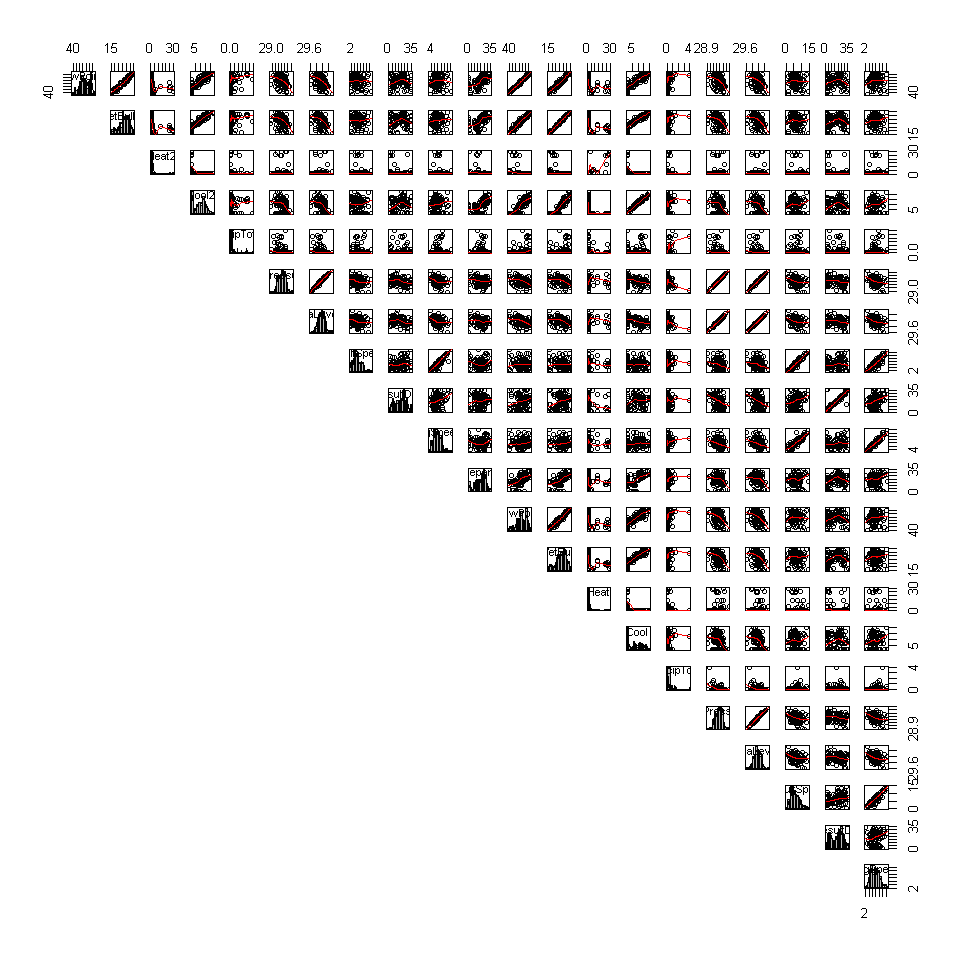

In [13]:
options(repr.plot.width = 8, repr.plot.height = 8)

pairs(p2, 
      upper.panel = panel.smooth,
      diag.panel = panel.hist, 
      lower.panel = NULL,
      cex=0.8)

In [8]:
var1<-c('Tmax2', 'Tmin2', 'Tavg2', 'DewPoint2', 'WetBulb2', 'Heat2', 'Cool2', 'PrecipTotal2', 'StnPressure2', 'SeaLevel2', 'ResultSpeed2', 'ResultDir2', 'AvgSpeed2','Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed')
p1<-ff9[var1]

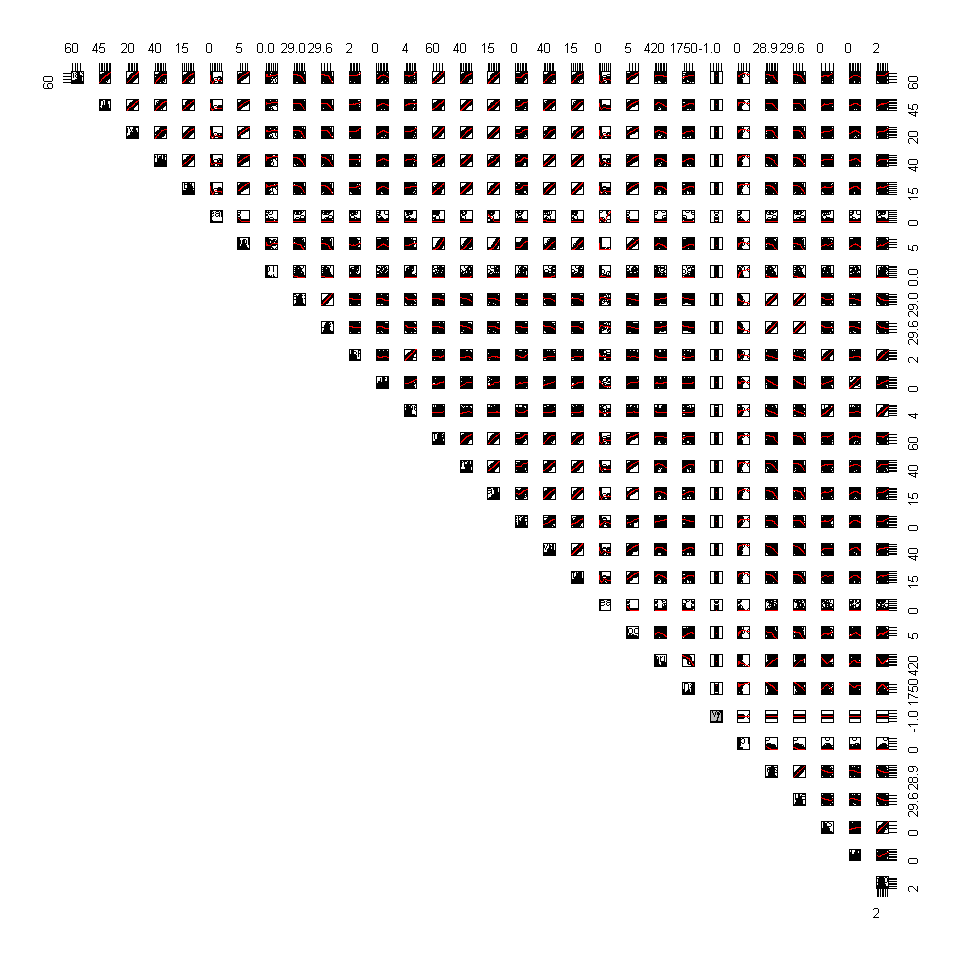

In [10]:

options(repr.plot.width = 8, repr.plot.height = 8)

pairs(p1, 
      upper.panel = panel.smooth,
      diag.panel = panel.hist, 
      lower.panel = NULL,
      cex=0.8)


In [9]:
var9<-c('Date', 'ID.OB', 'Month_Yr', 'Address', 'Block', 'Latitude', 'Longitude', 'Street', 'CULEX_ERRATICUS', 'CULEX_PIPIENS', 'CULEX_PIPIENS_RESTUANS', 'CULEX_RESTUANS', 'CULEX_SALINARIUS', 'CULEX_TARSALIS', 'CULEX_TERRITANS', 'Month', 'ParasiticIn.', 'Influenza.', 'Spray', 'Year' ,'TrapM', 'WnvPresentB', 'Tmax2', 'Tmin2', 'Tavg2',  'WetBulb2', 'Heat2' ,'PrecipTotal2' ,'StnPressure2', 'ResultDir2', 'AvgSpeed2' ,  'DZ2', 'FG2' ,  'GR2', 'HZ2', 'RA2' ,'RA45.2' ,'BR2', 'TS2', 'TSRA2', 'VCTS2', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint' , 'Heat', 'Cool' ,'Sunrise', 'Sunset' ,'SnowFall', 'PrecipTotal' , 'ResultSpeed' ,'ResultDir' ,'AvgSpeed', 'BCFG','BR' ,'DZ','FG' ,'FG.', 'FU' ,'HZ', 'RA', 'RA45', 'TS', 'TSRA', 'VCTS', 'pre45_1_2', 'pre45_1', 'pre45_05', 'pre45_052')
f9<-ff9[var9]

In [10]:
dim(f9)
head(f9)

[1] 4616   71

Date,ID.OB,Month_Yr,Address,Block,Latitude,Longitude,Street,CULEX_ERRATICUS,CULEX_PIPIENS,...,HZ,RA,RA45,TS,TSRA,VCTS,pre45_1_2,pre45_1,pre45_05,pre45_052
2007-05-29,1,2007-05,"1100 Roosevelt Road, Chicago, IL 60608, USA",11,41.86711,-87.65422,W ROOSEVELT,0,0,...,1,0,15.77226,0,0,0,1,1,1,1
2007-05-29,2,2007-05,"1100 South Peoria Street, Chicago, IL 60608, USA",11,41.86229,-87.64886,S PEORIA ST,0,0,...,1,0,15.77226,0,0,0,1,1,1,1
2007-05-29,3,2007-05,"1100 West Chicago Avenue, Chicago, IL 60642, USA",11,41.89628,-87.65523,W CHICAGO,0,0,...,1,0,15.77226,0,0,0,1,1,1,1
2007-05-29,4,2007-05,"1500 North Long Avenue, Chicago, IL 60651, USA",15,41.90765,-87.76089,N LONG AVE,0,0,...,1,0,15.77226,0,0,0,1,1,1,1
2007-05-29,5,2007-05,"1500 West Webster Avenue, Chicago, IL 60614, USA",15,41.92160,-87.66645,W WEBSTER AVE,0,0,...,1,0,15.77226,0,0,0,1,1,1,1
2007-05-29,6,2007-05,"1700 West 95th Street, Chicago, IL 60643, USA",17,41.72085,-87.66601,W 95TH ST,0,0,...,1,0,15.77226,0,0,0,1,1,1,1


In [11]:
f9 <- f9 %>% 
  mutate(Seasons=  ifelse(Month ==5, "Spring", 
                   ifelse(Month < 9 , "Summer", "Autumn")))

In [12]:
head(f9)

Date,ID.OB,Month_Yr,Address,Block,Latitude,Longitude,Street,CULEX_ERRATICUS,CULEX_PIPIENS,...,RA,RA45,TS,TSRA,VCTS,pre45_1_2,pre45_1,pre45_05,pre45_052,Seasons
2007-05-29,1,2007-05,"1100 Roosevelt Road, Chicago, IL 60608, USA",11,41.86711,-87.65422,W ROOSEVELT,0,0,...,0,15.77226,0,0,0,1,1,1,1,Spring
2007-05-29,2,2007-05,"1100 South Peoria Street, Chicago, IL 60608, USA",11,41.86229,-87.64886,S PEORIA ST,0,0,...,0,15.77226,0,0,0,1,1,1,1,Spring
2007-05-29,3,2007-05,"1100 West Chicago Avenue, Chicago, IL 60642, USA",11,41.89628,-87.65523,W CHICAGO,0,0,...,0,15.77226,0,0,0,1,1,1,1,Spring
2007-05-29,4,2007-05,"1500 North Long Avenue, Chicago, IL 60651, USA",15,41.90765,-87.76089,N LONG AVE,0,0,...,0,15.77226,0,0,0,1,1,1,1,Spring
2007-05-29,5,2007-05,"1500 West Webster Avenue, Chicago, IL 60614, USA",15,41.92160,-87.66645,W WEBSTER AVE,0,0,...,0,15.77226,0,0,0,1,1,1,1,Spring
2007-05-29,6,2007-05,"1700 West 95th Street, Chicago, IL 60643, USA",17,41.72085,-87.66601,W 95TH ST,0,0,...,0,15.77226,0,0,0,1,1,1,1,Spring


"Spring" = 1, "Summer" =2, 'Autumn'=3

In [13]:
f9$Season_code<-ifelse(f9$Seasons =="Spring", 1,
                   ifelse(f9$Seasons=="Summer",2 ,3 ))

In [14]:
library(fastDummies)

Warning message:
"package 'fastDummies' was built under R version 3.5.2"

In [15]:
f9 <- fastDummies::dummy_cols(f9, select_columns = "Season_code")

In [16]:
head(f9)

Date,ID.OB,Month_Yr,Address,Block,Latitude,Longitude,Street,CULEX_ERRATICUS,CULEX_PIPIENS,...,VCTS,pre45_1_2,pre45_1,pre45_05,pre45_052,Seasons,Season_code,Season_code_1,Season_code_2,Season_code_3
2007-05-29,1,2007-05,"1100 Roosevelt Road, Chicago, IL 60608, USA",11,41.86711,-87.65422,W ROOSEVELT,0,0,...,0,1,1,1,1,Spring,1,1,0,0
2007-05-29,2,2007-05,"1100 South Peoria Street, Chicago, IL 60608, USA",11,41.86229,-87.64886,S PEORIA ST,0,0,...,0,1,1,1,1,Spring,1,1,0,0
2007-05-29,3,2007-05,"1100 West Chicago Avenue, Chicago, IL 60642, USA",11,41.89628,-87.65523,W CHICAGO,0,0,...,0,1,1,1,1,Spring,1,1,0,0
2007-05-29,4,2007-05,"1500 North Long Avenue, Chicago, IL 60651, USA",15,41.90765,-87.76089,N LONG AVE,0,0,...,0,1,1,1,1,Spring,1,1,0,0
2007-05-29,5,2007-05,"1500 West Webster Avenue, Chicago, IL 60614, USA",15,41.92160,-87.66645,W WEBSTER AVE,0,0,...,0,1,1,1,1,Spring,1,1,0,0
2007-05-29,6,2007-05,"1700 West 95th Street, Chicago, IL 60643, USA",17,41.72085,-87.66601,W 95TH ST,0,0,...,0,1,1,1,1,Spring,1,1,0,0


In [17]:
f9$Seasons <- NULL 
f9$Season_code <- NULL 

In [18]:
str(f9)

'data.frame':	4616 obs. of  74 variables:
 $ Date                  : Date, format: "2007-05-29" "2007-05-29" ...
 $ ID.OB                 : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Month_Yr              : Factor w/ 20 levels "2007-05","2007-06",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Address               : Factor w/ 138 levels "1000 East 67th Street, Chicago, IL 60637, USA",..: 6 8 10 14 16 19 26 28 29 32 ...
 $ Block                 : int  11 11 11 15 15 17 21 22 22 22 ...
 $ Latitude              : num  41.9 41.9 41.9 41.9 41.9 ...
 $ Longitude             : num  -87.7 -87.6 -87.7 -87.8 -87.7 ...
 $ Street                : Factor w/ 128 levels "  W ARMITAGE AVENUE",..: 124 75 108 27 128 103 42 18 88 102 ...
 $ CULEX_ERRATICUS       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CULEX_PIPIENS         : int  0 0 0 0 0 0 0 0 0 1 ...
 $ CULEX_PIPIENS_RESTUANS: int  1 0 0 0 0 0 1 2 1 0 ...
 $ CULEX_RESTUANS        : int  2 1 1 1 2 3 0 3 1 5 ...
 $ CULEX_SALINARIUS      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CULEX_TARSALIS

In [19]:
colnames(f9)

[1] "Date"                   "ID.OB"                  "Month_Yr"              
 [4] "Address"                "Block"                  "Latitude"              
 [7] "Longitude"              "Street"                 "CULEX_ERRATICUS"       
[10] "CULEX_PIPIENS"          "CULEX_PIPIENS_RESTUANS" "CULEX_RESTUANS"        
[13] "CULEX_SALINARIUS"       "CULEX_TARSALIS"         "CULEX_TERRITANS"       
[16] "Month"                  "ParasiticIn."           "Influenza."            
[19] "Spray"                  "Year"                   "TrapM"                 
[22] "WnvPresentB"            "Tmax2"                  "Tmin2"                 
[25] "Tavg2"                  "WetBulb2"               "Heat2"                 
[28] "PrecipTotal2"           "StnPressure2"           "ResultDir2"            
[31] "AvgSpeed2"              "DZ2"                    "FG2"                   
[34] "GR2"                    "HZ2"                    "RA2"                   
[37] "RA45.2"                 "BR2"                    "TS2"                   
[40] "TSRA2"                  "VCTS2"                  "Tmax"                  
[43] "Tmin"                   "Tavg"                   "Depart"                
[46] "DewPoint"               "Heat"                   "Cool"                  
[49] "Sunrise"                "Sunset"                 "SnowFall"              
[52] "PrecipTotal"            "ResultSpeed"            "ResultDir"             
[55] "AvgSpeed"               "BCFG"                   "BR"                    
[58] "DZ"                     "FG"                     "FG."                   
[61] "FU"                     "HZ"                     "RA"                    
[64] "RA45"                   "TS"                     "TSRA"                  
[67] "VCTS"                   "pre45_1_2"              "pre45_1"               
[70] "pre45_05"               "pre45_052"              "Season_code_1"         
[73] "Season_code_2"          "Season_code_3"

In [20]:
f9$SnowFall<-NULL

In [21]:
f9 <- f9[c('Date', 'ID.OB', 'Month_Yr', 'Address', 'Street', 'Block', 'Latitude', 'Longitude','Year', 'Month','Season_code_1', 'Season_code_2', 'Season_code_3', 'TrapM',  'CULEX_ERRATICUS', 'CULEX_PIPIENS', 'CULEX_PIPIENS_RESTUANS', 'CULEX_RESTUANS', 'CULEX_SALINARIUS', 'CULEX_TARSALIS', 'CULEX_TERRITANS',  'ParasiticIn.', 'Influenza.', 'Spray',  'WnvPresentB', 'Tmax2', 'Tmin2', 'Tavg2', 'WetBulb2', 'Heat2', 'PrecipTotal2', 'StnPressure2', 'ResultDir2', 'AvgSpeed2', 'DZ2', 'FG2', 'GR2', 'HZ2', 'RA2', 'RA45.2', 'BR2', 'TS2', 'TSRA2', 'VCTS2', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint', 'Heat', 'Cool', 'Sunrise', 'Sunset','PrecipTotal', 'ResultSpeed', 'ResultDir', 'AvgSpeed', 'BCFG', 'BR', 'DZ', 'FG', 'FG.', 'FU', 'HZ' ,'RA', 'RA45', 'TS', 'TSRA', 'VCTS', 'pre45_1_2', 'pre45_1', 'pre45_05', 'pre45_052')]

In [22]:
str(f9)

'data.frame':	4616 obs. of  73 variables:
 $ Date                  : Date, format: "2007-05-29" "2007-05-29" ...
 $ ID.OB                 : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Month_Yr              : Factor w/ 20 levels "2007-05","2007-06",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Address               : Factor w/ 138 levels "1000 East 67th Street, Chicago, IL 60637, USA",..: 6 8 10 14 16 19 26 28 29 32 ...
 $ Street                : Factor w/ 128 levels "  W ARMITAGE AVENUE",..: 124 75 108 27 128 103 42 18 88 102 ...
 $ Block                 : int  11 11 11 15 15 17 21 22 22 22 ...
 $ Latitude              : num  41.9 41.9 41.9 41.9 41.9 ...
 $ Longitude             : num  -87.7 -87.6 -87.7 -87.8 -87.7 ...
 $ Year                  : int  2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 ...
 $ Month                 : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Season_code_1         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Season_code_2         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Season_code_3         : int  0 0 0 0 0 0

In [2]:
f9 <- read.csv(file="C:/Users/Chen/Project/data/f9.csv")

In [23]:
summary(f9)

      Date                ID.OB         Month_Yr   
 Min.   :2007-05-29   Min.   :   1   2007-08: 574  
 1st Qu.:2007-09-12   1st Qu.:1155   2007-09: 382  
 Median :2009-09-17   Median :2308   2013-08: 357  
 Mean   :2010-05-26   Mean   :2308   2009-07: 285  
 3rd Qu.:2013-06-07   3rd Qu.:3462   2013-07: 285  
 Max.   :2013-09-26   Max.   :4616   2011-09: 280  
                                     (Other):2453  
                                                 Address    
 4100 North Oak Park Avenue, Chicago, IL 60634, USA  :  67  
 7000 West Armitage Avenue, Chicago, IL 60707, USA   :  67  
 1100 Roosevelt Road, Chicago, IL 60608, USA         :  66  
 2200 North Cannon Drive, Chicago, IL 60614, USA     :  66  
 3600 North Pittsburgh Avenue, Chicago, IL 60634, USA:  66  
 4200 West 127th Street, Alsip, IL 60803, USA        :  66  
 (Other)                                             :4218  
                 Street         Block          Latitude       Longitude     
  S ASHLAND AVE    

In [24]:
f9$FG.<-NULL
f9$FU<-NULL
f9$BCFG<-NULL
f9$GR2<-NULL
f9$Spray<-NULL

In [25]:
str(f9)

'data.frame':	4616 obs. of  68 variables:
 $ Date                  : Date, format: "2007-05-29" "2007-05-29" ...
 $ ID.OB                 : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Month_Yr              : Factor w/ 20 levels "2007-05","2007-06",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Address               : Factor w/ 138 levels "1000 East 67th Street, Chicago, IL 60637, USA",..: 6 8 10 14 16 19 26 28 29 32 ...
 $ Street                : Factor w/ 128 levels "  W ARMITAGE AVENUE",..: 124 75 108 27 128 103 42 18 88 102 ...
 $ Block                 : int  11 11 11 15 15 17 21 22 22 22 ...
 $ Latitude              : num  41.9 41.9 41.9 41.9 41.9 ...
 $ Longitude             : num  -87.7 -87.6 -87.7 -87.8 -87.7 ...
 $ Year                  : int  2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 ...
 $ Month                 : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Season_code_1         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Season_code_2         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Season_code_3         : int  0 0 0 0 0 0

In [27]:
write.csv(f9, file="C:/Users/Chen/Project/data/f9.csv", row.names =F)